# Introduction to Support Vector Machine (SVM)

> In this notebook, it will show you:
1. What is support vector machine
2. What is the pros and cons of svm
3. What application could use svm
4. SVM implementation with sk-learn
5. Break it down
6. More reference


### 1. What is support vector machine?
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both **classification** or **regression** challenges as well as **outliers detection**. However,  it is mostly used in **classification problems**.

we perform classification by finding the **hyper-plane** or **line** that differentiate the two classes very well (look at the below snapshot)

<img src="asset/Support_Vector_Machine.png",width=400,height=400, style="float: left;">

In SVM, it is easy to have a linear hyper-plane between these two classes, but what if our problem is non-linear? 

SVM has a technique called the **kernel trick**. These are functions which **takes low dimensional input space and transform it to a higher dimensional space**.

**SVM Loss function:**
it uses the [Hinge loss](https://en.wikipedia.org/wiki/Hinge_loss) which is used for "maximum-margin" classification, most notably for support vector machines (SVMs). And using Gradient Decent to minimize the loss function.


A kernel function(also called "similarity function") maps pairs of datapoints onto their inner products (i.e., they work like distance functions).

Mathematical minimization can then be used to find the **max-margin hyperplane** in the feature-space.

The effect is to identify a non-linear (curved) boundary in the original data space.

Below is the mathmatic description:

<img src="asset/Support_Vector_Machine_Cost_Funcion2.png",width=500,height=500, style="float: left;">

<img src="asset/Support_Vector_Machine_Cost_Funcion1.png",width=500,height=500, style="float: left;">

<img src="asset/Support_Vector_Machine_Kernel.png",width=600,height=600, style="float: left;">



### 2.What is the pros and cons of svm

**Pros:**
* Effective in high dimensional spaces.
* It works really well with clear margin of separation
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but * * it is also possible to specify custom kernels.

**Cons:**
* **Not scalable**, it doesn’t perform well, when we **have large data set** because the required training time is higher.
* If the number of features is much greater than the number of samples, the method is likely to give poor performances.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

Below is the tips about** SVM vs Logistic Algorithm vs Neural Network:**

<img src="asset/Support_Vector_Machine_Comparation.png",width=500,height=500, style="float: left;">



### 3. What application could use SVM
SVM has been used successfully in many real-world problems
   >* text (and hypertext) categorization
   >* image classification
   >* bioinformatics (Protein classification, Cancer classification)
   >* hand-written character recognition

### 4. SVM implementation with sk-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
# load data
iris = datasets.load_iris()
train_data = iris.data[:, :2] # we only take the first two features.
train_label = iris.target

In [3]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
def buildSVMModel(train_data, train_label, kernel, C=1, gamma='auto'):
    model = svm.SVC(kernel=kernel, C=C,gamma=gamma)
    model.fit(train_data, train_label)
    return model

In [4]:
# plot decisionBounday to check the difference among different kernel and paramerters.
def plotDecisionBoundary(model, train_data, train_label):
    # create a mesh to plot in
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
     np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with kernels')
    plt.show()

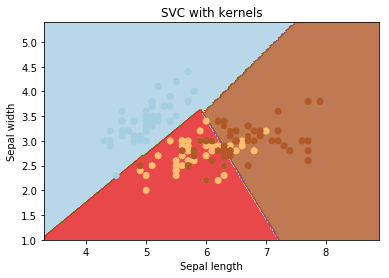

In [5]:
# Linear Kernel
model = buildSVMModel(train_data, train_label, "linear")
plotDecisionBoundary(model, train_data, train_label)

**Tuning Parameters of SVM**

> **kernel**: We have already discussed about it. Here, we have various options available with kernel like, “linear”, “rbf”,”poly” and others (default value is “rbf”).  Here “rbf” and “poly” are useful for non-linear hyper-plane. 

> **gamma**: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

> **C**: Penalty parameter C of the error term, hyper-param for **regularization**. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

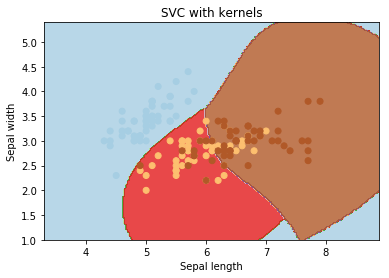

In [11]:
# RBF Kernel, you can try different setting for c and gamma to see how the descion boundary changes.
c=10 # it is hyper-param to help reduce over-fitting. and smaller values specify stronger regularization.
gamma=0.5
model = buildSVMModel(train_data, train_label, 'rbf', c, gamma)
plotDecisionBoundary(model, train_data, train_label)

### 5. Break it down
* **SVM** can be used for both **classification** or **regression** as well as **outliers detection**. it is mostly used in **classification problems**;
* **SVM** find the max-margin hyperplane in the feature-space as decision boundary;
* **SVM** use **kernel trick** (also called **similarity function**) to solve more **complicated problem**, which takes **low dimensional input space** and transform it to a **higher dimensional space**;
* **SVM** is one of the most widely used learning algorithms today.

### 6. More Reference
https://www.coursera.org/learn/machine-learning/lecture/hxdcH/kernels-ii

http://users.sussex.ac.uk/~christ/crs/ml/lec08a.html

http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf

https://www.r-bloggers.com/learning-kernels-svm/

http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html#sphx-glr-auto-examples-applications-plot-outlier-detection-housing-py